# PDA Project Dec 2018 
by Colm Doherty


# 1. Researching an existing dataset

As a recreational sailor I'm very interested in weather data. I searched for & found a good dataset source on Data.gov.ie, compiled by Met Eireann and detailing monthly rainfall at the Dun Laoghaire weather station, 1997-2018. It's available at: https://cli.fusio.net/cli/climate_data/webdata/mly9223.csv
        

## Import Libraries

In [53]:
# Import pandas etc.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statistics

## Import Dataset

In [2]:
# Load the dataset
import csv as df
df = pd.read_csv("MET9223.csv", skiprows=13) 

The four variables measured are: 
"rain":  -  Precipitation Amount (mm), 
"gdf":   -  Greatest daily fall (mm), 
"rd":    -  Number of rain days (0.2mm or more), 
"wd":    -  Number of wet days (1.0 mm or more)	


In [3]:
df

,year,month,rain,gdf,rd,wd
0,1997,8,91.8,17.4,18,16
1,1997,9,11.5,2.9,12,4
2,1997,10,70.7,20.7,14,10
3,1997,11,187.4,54.6,22,17
4,1997,12,84.4,21.7,14,12
5,1998,1,109.4,16.5,19,15
6,1998,2,8.4,2.9,8,4
7,1998,3,61.3,10.3,15,11
8,1998,4,136.5,39,26,16
9,1998,5,27.7,12.5,11,5


We can see that 'rain' and 'gdf' are floating point values,'rd'and 'wd' are positive Integers. Only the 'rain' variable shows a full 253 observations. The other 3 columns are missing some values.

In [4]:
# what does the data distribution look like?
df.describe()

,year,month,rain
count,253.000000,253.000000,253.000000
mean,2007.624506,6.505929,66.385375
std,6.110532,3.453340,40.455267
min,1997.000000,1.000000,1.200000
25%,2002.000000,4.000000,36.600000
50%,2008.000000,7.000000,57.500000
75%,2013.000000,9.000000,88.300000
max,2018.000000,12.000000,207.000000


In [5]:
# ok, lets ignore the Year & Month columns
df1 = df.iloc[:,2:4]
df1.describe()

,rain
count,253.000000
mean,66.385375
std,40.455267
min,1.200000
25%,36.600000
50%,57.500000
75%,88.300000
max,207.000000


only the 'rain' column data is summarised, because the other three variables are of dtype 'object'

In [6]:
df.dtypes

year       int64
month      int64
rain     float64
gdf       object
rd        object
wd        object
dtype: object

In [7]:
pd.to_numeric

<function pandas.core.tools.numeric.to_numeric(arg, errors='raise', downcast=None)>

In [8]:
# note gdf,rd,wd are all objects. Convert them to float64. 
# (https://stackoverflow.com/questions/28277137/how-to-convert-datatypeobject-to-float64-in-python)
df.infer_objects()

,year,month,rain,gdf,rd,wd
0,1997,8,91.8,17.4,18,16
1,1997,9,11.5,2.9,12,4
2,1997,10,70.7,20.7,14,10
3,1997,11,187.4,54.6,22,17
4,1997,12,84.4,21.7,14,12
5,1998,1,109.4,16.5,19,15
6,1998,2,8.4,2.9,8,4
7,1998,3,61.3,10.3,15,11
8,1998,4,136.5,39,26,16
9,1998,5,27.7,12.5,11,5


In [9]:
df.dtypes

year       int64
month      int64
rain     float64
gdf       object
rd        object
wd        object
dtype: object

In [10]:
# see: https://stackoverflow.com/questions/47333227/pandas-valueerror-cannot-convert-float-nan-to-integer

# identify & ignore all 'NaN' values with boolean indexing:
print(df[df['gdf'].isnull()])

Empty DataFrame
Columns: [year, month, rain, gdf, rd, wd]
Index: []


In [11]:
# remove all NaN values use to_numeric with parameter errors='coerce' - it replace non numeric to NaNs:
df['gdf'] = pd.to_numeric(df['gdf'], errors='coerce')

# to remove all rows with NaNs in column, use dropna:
df = df.dropna(subset=['gdf'])

# Finally convert values to ints:
df['gdf'] = df['gdf'].astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
df1=df.iloc[:,4]

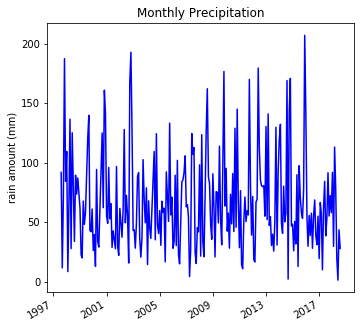

In [13]:
# plot monthly rain data: 
# https://stackoverflow.com/questions/52975561/how-to-combine-month-and-year-columns-of-data-frame-to-form-time-series-data

ax = df.set_index(pd.to_datetime(df[['year','month']].assign(day=1)))['rain']\
       .plot(color='b', figsize=(5.5,5.5), title='Monthly Precipitation')
_ = ax.set_xlabel('')
_ = ax.set_ylabel('rain amount (mm)')           

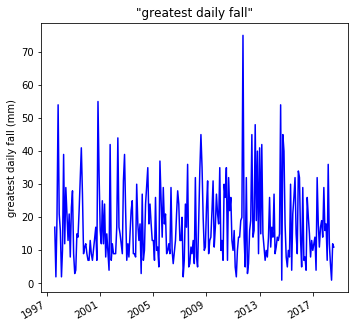

In [14]:
# plot monthly "greatest daily fall" data: 
# https://stackoverflow.com/questions/52975561/how-to-combine-month-and-year-columns-of-data-frame-to-form-time-series-data

ax = df.set_index(pd.to_datetime(df[['year','month']].assign(day=1)))['gdf']\
       .plot(color='b', figsize=(5.5,5.5), title='"greatest daily fall"')
_ = ax.set_xlabel('')
_ = ax.set_ylabel('greatest daily fall (mm)')  


## Calculate the descriptive statistics of the variables in the dataset

In [15]:
# now lets get descriptive statistics for all four variables:
df1 = df[['rain','gdf','rd','wd']]
df1.describe()

,rain,gdf
count,244.000000,244.000000
mean,66.967213,17.647541
std,40.840552,11.742030
min,1.200000,1.000000
25%,37.175000,9.000000
50%,57.750000,14.000000
75%,89.400000,24.000000
max,207.000000,75.000000


So, variables 'rd' and 'wd' are still dtype 'objects'. Before fixing this, lets plot the distributions for 'rain' and 'gdf'.

## Plot the distributions of the variables in the dataset

In [16]:
# lets select & plot the rain variable
dfr = df[['rain']]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


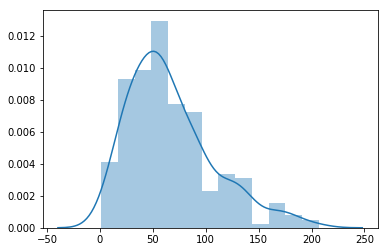

In [17]:
sns.distplot(dfr);

So values for monthly rainfall (mm) over 253 months are distributed to a (skewed) Normal distribution with a long tail of higher values

In [18]:
# select gdf
dfg = df[['gdf']]
dfg

,gdf
0,17
1,2
2,20
3,54
4,21
5,16
6,2
7,10
8,39
9,12


In [19]:
df = df.convert_objects(convert_numeric=True)
df.dtypes


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


year       int64
month      int64
rain     float64
gdf        int64
rd       float64
wd       float64
dtype: object

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


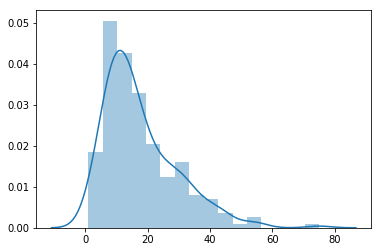

In [20]:
sns.distplot(dfg);

As with the 'rain' variable, values for 'Greatest Daily Fall (gdf) are distributed to a (skewed) Normal distribution with a long tail of higher values

In [21]:
# select rd. nb. Variables 'rd' and 'wd' should be Integers, not float64 dtypes!
dfr = df.iloc[:,4]
dfr

0      18.0
1      12.0
2      14.0
3      22.0
4      14.0
5      19.0
6       8.0
7      15.0
8      26.0
9      11.0
10      NaN
12      9.0
13     18.0
14     23.0
15     19.0
16     23.0
17     22.0
18     15.0
19     13.0
20     19.0
21     14.0
22     15.0
24     15.0
25     20.0
26     13.0
27     16.0
28     20.0
29     14.0
30     20.0
31      9.0
       ... 
223    14.0
224    13.0
225    13.0
226    16.0
227    17.0
228    15.0
229    16.0
230     8.0
231    13.0
232    15.0
233    13.0
234    16.0
235    16.0
236     7.0
237    16.0
238    18.0
239    12.0
240    15.0
241    23.0
242    15.0
243    15.0
244    15.0
245    21.0
246    15.0
247    22.0
248    21.0
249    10.0
250     2.0
251     9.0
252    14.0
Name: rd, Length: 244, dtype: float64

In [22]:
dfr.describe()

count    242.000000
mean      15.772727
std        4.745166
min        2.000000
25%       13.000000
50%       16.000000
75%       19.000000
max       30.000000
Name: rd, dtype: float64

In [23]:
# For identifying NaN values use boolean indexing:
print(dfr[dfr[:].isnull()])

10   NaN
47   NaN
Name: rd, dtype: float64


In [24]:
# remove all NaN values (ref: https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan)
dfr = dfr[pd.notnull(df['rd'])]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


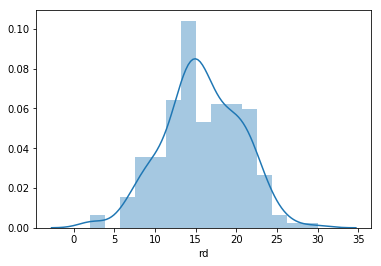

In [25]:
sns.distplot(dfr);

So the values for 'Number of rain days (0.2mm or more)' are also distributed to a fairly Normal distribution with an extra bump at around +1 SD (values of 20.5)

In [26]:
# select wet days (wd). Filter out any NaNs. 
dfw = df.iloc[:,5]
dfw

0      16.0
1       4.0
2      10.0
3      17.0
4      12.0
5      15.0
6       4.0
7      11.0
8      16.0
9       5.0
10      NaN
12      7.0
13     17.0
14     15.0
15     14.0
16     17.0
17     12.0
18      6.0
19      5.0
20     14.0
21     10.0
22     11.0
24      9.0
25     13.0
26      7.0
27      6.0
28     12.0
29      6.0
30     13.0
31      3.0
       ... 
223     8.0
224     9.0
225     9.0
226    14.0
227    11.0
228     8.0
229    14.0
230     4.0
231     7.0
232    11.0
233     5.0
234    12.0
235    12.0
236     3.0
237     9.0
238    12.0
239     7.0
240     9.0
241    13.0
242    10.0
243    10.0
244    10.0
245    17.0
246    11.0
247    18.0
248    16.0
249     5.0
250     1.0
251     7.0
252    10.0
Name: wd, Length: 244, dtype: float64

In [27]:
#describe the 'wet days' data distribution
dfw.describe()

count    242.000000
mean      10.851240
std        4.310869
min        1.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       22.000000
Name: wd, dtype: float64

In [28]:
# For identifying NaN values use boolean indexing:
print(dfw[dfw[:].isnull()])

10   NaN
47   NaN
Name: wd, dtype: float64


Hence the diff of 2 on the count (242 versus 244) : the NaNs.

In [29]:
# remove all NaN values (ref: https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan)
dfw = dfw[pd.notnull(df['wd'])]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


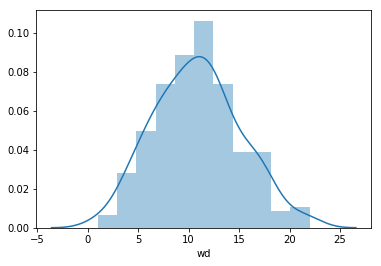

In [30]:
sns.distplot(dfw);

Numbers of monthly wet days(1mm or more) 'wd' are distributed to an almost Normal distribution around a Mean of 10.85 days

## Calculate the relationships between certain variables in the dataset

The Distribution plots suggest a positive correlation between two pairs of variables - namely rain & gdf, and rd & wd. Lets draw scatterplots to get a feel of the relationship (if any) between the variables as suggested by the data. 

But first, lets remind ourselves of the descriptive statistics for all four variables:

In [31]:
dfr.describe()

count    242.000000
mean      15.772727
std        4.745166
min        2.000000
25%       13.000000
50%       16.000000
75%       19.000000
max       30.000000
Name: rd, dtype: float64

In [32]:
df.describe()
df.dtypes

year       int64
month      int64
rain     float64
gdf        int64
rd       float64
wd       float64
dtype: object

### Boxplots

Lets first make boxplots of the 4 variables, displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). 

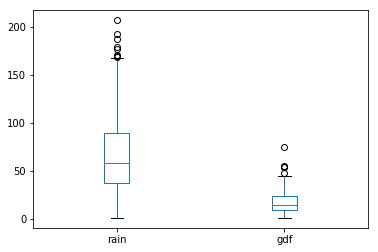

In [33]:
	df1.plot.box()

### Scatterplots

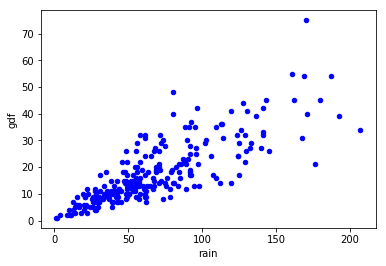

In [34]:
df.plot(kind='scatter',x='rain',y='gdf',color='blue')

The scatter plot indeed suggests a positive correlation between monthly rainfall values (mm) and greatest daily fall values (mm) in each month. This may seem unsurprising, but there are countries (Spain perhaps?) where it can rain very heavily for one or two days, and hardly at all for the rest of the month - so this correlation is not an obvious one, except in countries like Ireland where it rains pretty consistently in certain months of the year, during which the heaviest one-day falls also occur. 

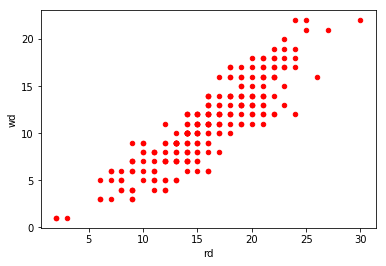

In [35]:
df.plot(kind='scatter',x='rd',y='wd',color='red')

This scatter plot suggests a linear relationship between two variables, with a high correlation between the number of days each month in which rainfall exceeded 0.2mm (rd), and the number of days each month in which rainfall exceeded 1.0mm (wd). This is hardly a surprising discovery, since any day when >1mm of rain fell is also a day when >0.2mm of rain fell (verified by checking sum of rd + wd : in many months it exceeded 31, with some values as high as 52).

### Linear Regression models using Seaborn

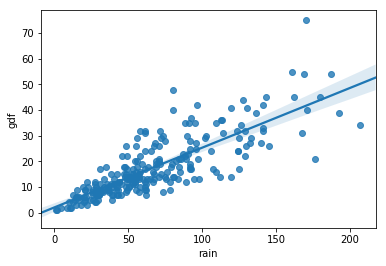

In [36]:
sns.regplot(x="rain", y="gdf", data=df);

sns.regplot plots the regression line and a 95% confidence interval for that regression. As the shaded bands widen, the range of possible lines of regression at 95% confidence intervals 
also widen.


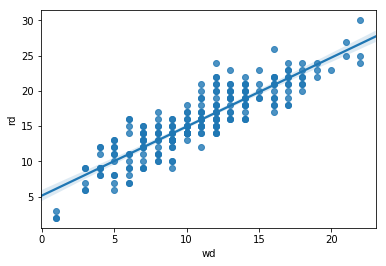

In [37]:
sns.regplot(x="wd", y="rd", data=df);


So this regression line, also drawn with sns.regplot, shows a tighter relationship between the two variables over the whole range of data values than the previous plot.

### Calculate the Coefficient of correlation for both pairs of variables

Now lets look at the coefficient of correlation between each pair of variables (rain & greatest daily fall). In order to calculate the correlations for each dataset I must restate each of values as a distinct array which can be called by the np.corrcoef(x, y) command:

In [38]:
#numpy array datasets
np.array(df['rain'].tolist())

array([ 91.8,  11.5,  70.7, 187.4,  84.4, 109.4,   8.4,  61.3, 136.5,
        27.7, 125.1,  33.8,  89.4,  73.5,  87.1,  74.8,  61.8,  22.4,
        19.9,  67.7,  48.1,  58.2, 119.6, 139.8,  42.9,  41.9,  61. ,
        26.1,  39.6,  12.8,  94.3,  33.9,  29. , 124.9,  62.1, 160.9,
       141.4,  55.1,  49. ,  96. ,  52.7,  65.5,  28.7,  42.6,  27.6,
        96.7,  29.8,  22. ,  61.5,  37.3,  61.1, 127.8,  49.4,  72.4,
        54.8,  15.6, 167.5, 192.8, 129.1,  42.9,  43.5,  28.1,  48.3,
        88.1,  91.6,  36.6,  20.5,  36.8, 102.5,  68.6,  49.4,  78.8,
        14.3,  67.9,  45.2,  36.3,  61.3, 109.4,  35.1, 124.3,  47.6,
        40.4,  59.7,  30.5,  67.5,  58.1,  61.7,  16.6,  92.2,  50.6,
       133.2,  56. ,  71. ,  28. ,  33.6,  89.4,  30.2, 101.9,  22.6,
        14.9,  83.9,  85.4,  91.8, 105.7,  62.8,  64.7,  54.7,   4.2,
        26. , 124.5, 107.1, 112.6,  24.4,  15.2,  45.3,  41.8,  98.1,
        21.4, 123.5,  33.2,  20.9,  71.6, 126. , 162.1,  88.3,  82.4,
        48.3,  35.6,

In [39]:
np.array(df['gdf'].tolist())

array([17,  2, 20, 54, 21, 16,  2, 10, 39, 12, 29, 13, 21,  8, 23, 28,  9,
        3,  4, 15, 14, 22, 41, 27,  9, 11, 12,  9,  7,  7, 13,  9,  7, 17,
        7, 55, 33, 16, 12, 25, 12, 24,  8, 15,  4, 42,  7, 12,  9,  9, 17,
       44, 17, 15, 12,  9, 31, 39, 22,  7, 12,  8, 15, 22, 25,  9,  9,  8,
       30, 18, 13, 18,  3, 27,  7, 10, 24, 35, 18, 24, 18, 13, 13,  7, 26,
       10, 11,  5, 37, 14, 29, 18, 21,  9, 10, 12,  9, 29, 10,  6, 13, 21,
       28, 24, 13, 13, 20,  2,  7, 24, 17, 36,  5,  6, 11,  9, 13,  6, 32,
        8,  5, 19, 34, 45, 35, 20, 10, 11, 23, 31,  9, 13, 14, 22, 31, 11,
       17, 27, 21, 18, 35, 10, 13,  7, 30, 26, 35,  7, 32, 22, 26, 13, 10,
       16,  5,  2, 10, 14, 14, 19, 20, 75, 14,  5, 32,  3,  6, 16, 19, 45,
       14, 16, 48, 19, 40,  9, 41, 15, 42, 15, 11,  7, 10,  8, 14, 26, 11,
       17, 14, 27,  9, 11, 14, 13, 15, 54,  1, 45, 40, 18,  8,  5, 10,  8,
       30,  4, 21, 26, 32, 15,  9, 34, 32, 13,  5, 29,  7,  8,  4, 26, 20,
       15,  8, 13, 10, 12

In [40]:
rain = np.array([ 91.8,  11.5,  70.7, 187.4,  84.4, 109.4,   8.4,  61.3, 136.5,
        27.7, 125.1,  33.8,  89.4,  73.5,  87.1,  74.8,  61.8,  22.4,
        19.9,  67.7,  48.1,  58.2, 119.6, 139.8,  42.9,  41.9,  61. ,
        26.1,  39.6,  12.8,  94.3,  33.9,  29. , 124.9,  62.1, 160.9,
       141.4,  55.1,  49. ,  96. ,  52.7,  65.5,  28.7,  42.6,  27.6,
        96.7,  29.8,  22. ,  61.5,  37.3,  61.1, 127.8,  49.4,  72.4,
        54.8,  15.6, 167.5, 192.8, 129.1,  42.9,  43.5,  28.1,  48.3,
        88.1,  91.6,  36.6,  20.5,  36.8, 102.5,  68.6,  49.4,  78.8,
        14.3,  67.9,  45.2,  36.3,  61.3, 109.4,  35.1, 124.3,  47.6,
        40.4,  59.7,  30.5,  67.5,  58.1,  61.7,  16.6,  92.2,  50.6,
       133.2,  56. ,  71. ,  28. ,  33.6,  89.4,  30.2, 101.9,  22.6,
        14.9,  83.9,  85.4,  91.8, 105.7,  62.8,  64.7,  54.7,   4.2,
        26. , 124.5, 107.1, 112.6,  24.4,  15.2,  45.3,  41.8,  98.1,
        21.4, 123.5,  33.2,  20.9,  71.6, 126. , 162.1,  88.3,  82.4,
        48.3,  35.6,  90.6,  61.3,  20.7,  75.6,  75.1,  49.3, 113.8,
        52.9,  30.9,  95.7, 176.6,  63.5,  95.2,  42.4,  57.6,  28.1,
        73.4,  48.5,  90.8,  42.1, 128.9,  45.7, 145. ,  67.2,  28.5,
        76.4,  14.1,  10.8,  50.2,  71.1,  50.4,  59.6,  56. , 170. ,
        81.1,  39.1,  71.5,  18.3,  16.5,  67. ,  69.1, 179.5, 112.2,
        85.2,  80.5,  79.8,  80.6,  55. , 130.3,  52.1, 141. ,  47.3,
        54.6,  30.3,  39.8,  25.6,  51.4, 129.7,  30.7,  92.5, 119.2,
       132.2,  49.2,  40.6,  80.2,  50.2,  57.3, 169. ,   2.1, 142.9,
       170.8,  46.8,  48.2,  25.9,  50.5,  31.6,  89.8,  12.7,  97.4,
        70.6,  58.2,  53.1,  78. , 207. , 140.9,  53.3,  29.7,  55.6,
        38.7,  57.5,  28. ,  55.5,  68.6,  38.6,  31. ,  55. ,  19.3,
        66.5,  57.3,   9.9,  61.5,  84.3,  38.4,  53.1,  91.5,  55.1,
        72.3,  57.9,  91.8,  29.6, 113.1,  78.4,  20.1,   1.2,  43.5,
        27.8])

gdf = np.array([17,  2, 20, 54, 21, 16,  2, 10, 39, 12, 29, 13, 21,  8, 23, 28,  9,
        3,  4, 15, 14, 22, 41, 27,  9, 11, 12,  9,  7,  7, 13,  9,  7, 17,
        7, 55, 33, 16, 12, 25, 12, 24,  8, 15,  4, 42,  7, 12,  9,  9, 17,
       44, 17, 15, 12,  9, 31, 39, 22,  7, 12,  8, 15, 22, 25,  9,  9,  8,
       30, 18, 13, 18,  3, 27,  7, 10, 24, 35, 18, 24, 18, 13, 13,  7, 26,
       10, 11,  5, 37, 14, 29, 18, 21,  9, 10, 12,  9, 29, 10,  6, 13, 21,
       28, 24, 13, 13, 20,  2,  7, 24, 17, 36,  5,  6, 11,  9, 13,  6, 32,
        8,  5, 19, 34, 45, 35, 20, 10, 11, 23, 31,  9, 13, 14, 22, 31, 11,
       17, 27, 21, 18, 35, 10, 13,  7, 30, 26, 35,  7, 32, 22, 26, 13, 10,
       16,  5,  2, 10, 14, 14, 19, 20, 75, 14,  5, 32,  3,  6, 16, 19, 45,
       14, 16, 48, 19, 40,  9, 41, 15, 42, 15, 11,  7, 10,  8, 14, 26, 11,
       17, 14, 27,  9, 11, 14, 13, 15, 54,  1, 45, 40, 18,  8,  5, 10,  8,
       30,  4, 21, 26, 32, 15,  9, 34, 32, 13,  5, 29,  7,  8,  4, 26, 20,
       15,  8, 13, 10, 12, 14,  4, 32, 18, 11, 17, 19, 14, 29, 16, 18,  7,
       36, 12,  6,  1, 12, 11])

In [41]:
# find the correlation between 'rain' and 'gdf':
corr1 = np.corrcoef(rain,gdf)
corr1

array([[1.        , 0.80993617],
       [0.80993617, 1.        ]])

In [42]:
#numpy array datasets
np.array(df['wd'].tolist())

array([16.,  4., 10., 17., 12., 15.,  4., 11., 16.,  5., nan,  7., 17.,
       15., 14., 17., 12.,  6.,  5., 14., 10., 11.,  9., 13.,  7.,  6.,
       12.,  6., 13.,  3., 16., 11.,  9., 16., 17., 11., 17.,  8., 10.,
       12., 11.,  9.,  6., nan,  7., 12., 10.,  4., 13.,  5., 12., 15.,
       11., 12., 12.,  3., 15., 21., 18.,  7.,  8.,  8.,  9., 21., 10.,
       10.,  5.,  7.,  9.,  9., 12., 16.,  6., 14., 14.,  6., 11., 13.,
        8., 16.,  6., 10., 13.,  9.,  8., 14., 13.,  5.,  9., 10., 14.,
       11.,  9.,  8.,  7., 18.,  9., 13.,  4.,  3., 14., 10., 12., 16.,
       12., 13., 10.,  1.,  8., 17., 19., 12.,  7.,  4.,  8., 11., 17.,
        6., 12., 11.,  7., 13., 14., 18., 13., 13.,  8.,  7., 16.,  5.,
        5., 14., 13.,  8., 20., 18.,  5., 17., 22., 14., 12., 11.,  8.,
        9., 11.,  6., 12., 10., 15.,  9., 19., 11.,  8., 16.,  4.,  4.,
       11., 12., 10., 12., 12.,  9., 12., 14.,  8.,  7.,  5., 14., 13.,
       19., 18., 17.,  6., 13.,  7., 13., 17., 10., 12., 10., 11

In [43]:
#numpy array datasets
np.array(df['rd'].tolist())

array([18., 12., 14., 22., 14., 19.,  8., 15., 26., 11., nan,  9., 18.,
       23., 19., 23., 22., 15., 13., 19., 14., 15., 15., 20., 13., 16.,
       20., 14., 20.,  9., 20., 16., 16., 22., 22., 21., 24., 13., 16.,
       21., 19., 14., 11., nan, 14., 20., 14., 12., 16., 12., 17., 20.,
       16., 15., 15.,  6., 21., 25., 21., 15., 11., 11., 12., 27., 14.,
       17.,  6., 14., 12., 13., 18., 21.,  7., 17., 18., 10., 14., 17.,
       13., 21., 11., 18., 21., 13., 15., 21., 19.,  8., 15., 14., 20.,
       16., 13., 11., 13., 24., 14., 20.,  9.,  9., 18., 15., 17., 19.,
       21., 17., 16.,  3., 14., 21., 23., 16., 13.,  9., 12., 17., 19.,
        8., 24., 19., 10., 19., 16., 21., 16., 18., 17.,  9., 18., 11.,
       12., 18., 21., 10., 23., 23.,  8., 18., 24., 21., 16., 18., 10.,
        9., 16.,  7., 17., 17., 19., 13., 24., 16., 14., 19.,  9., 11.,
       20., 14., 14., 18., 14., 13., 15., 18., 16., 15.,  7., 21., 16.,
       22., 20., 23., 16., 19., 14., 19., 20., 14., 17., 15., 15

In [44]:
wd = np.array([16.,  4., 10., 17., 12., 15.,  4., 11., 16.,  5.,  7., 17.,
       15., 14., 17., 12.,  6.,  5., 14., 10., 11.,  9., 13.,  7.,  6.,
       12.,  6., 13.,  3., 16., 11.,  9., 16., 17., 11., 17.,  8., 10.,
       12., 11.,  9.,  6.,  7., 12., 10.,  4., 13.,  5., 12., 15.,
       11., 12., 12.,  3., 15., 21., 18.,  7.,  8.,  8.,  9., 21., 10.,
       10.,  5.,  7.,  9.,  9., 12., 16.,  6., 14., 14.,  6., 11., 13.,
        8., 16.,  6., 10., 13.,  9.,  8., 14., 13.,  5.,  9., 10., 14.,
       11.,  9.,  8.,  7., 18.,  9., 13.,  4.,  3., 14., 10., 12., 16.,
       12., 13., 10.,  1.,  8., 17., 19., 12.,  7.,  4.,  8., 11., 17.,
        6., 12., 11.,  7., 13., 14., 18., 13., 13.,  8.,  7., 16.,  5.,
        5., 14., 13.,  8., 20., 18.,  5., 17., 22., 14., 12., 11.,  8.,
        9., 11.,  6., 12., 10., 15.,  9., 19., 11.,  8., 16.,  4.,  4.,
       11., 12., 10., 12., 12.,  9., 12., 14.,  8.,  7.,  5., 14., 13.,
       19., 18., 17.,  6., 13.,  7., 13., 17., 10., 12., 10., 11.,  7.,
        6.,  7., 10., 14.,  7., 12., 22., 16., 12.,  9., 16.,  9., 10.,
       12.,  1., 11., 16.,  7., 14.,  7.,  9.,  9., 12.,  3., 14., 11.,
        6., 11., 18., 22., 14., 11.,  8.,  9.,  9., 14., 11.,  8., 14.,
        4.,  7., 11.,  5., 12., 12.,  3.,  9., 12.,  7.,  9., 13., 10.,
       10., 10., 17., 11., 18., 16.,  5.,  1.,  7., 10.])

rd = np.array([18., 12., 14., 22., 14., 19.,  8., 15., 26., 11., 9., 18.,
       23., 19., 23., 22., 15., 13., 19., 14., 15., 15., 20., 13., 16.,
       20., 14., 20.,  9., 20., 16., 16., 22., 22., 21., 24., 13., 16.,
       21., 19., 14., 11., 14., 20., 14., 12., 16., 12., 17., 20.,
       16., 15., 15.,  6., 21., 25., 21., 15., 11., 11., 12., 27., 14.,
       17.,  6., 14., 12., 13., 18., 21.,  7., 17., 18., 10., 14., 17.,
       13., 21., 11., 18., 21., 13., 15., 21., 19.,  8., 15., 14., 20.,
       16., 13., 11., 13., 24., 14., 20.,  9.,  9., 18., 15., 17., 19.,
       21., 17., 16.,  3., 14., 21., 23., 16., 13.,  9., 12., 17., 19.,
        8., 24., 19., 10., 19., 16., 21., 16., 18., 17.,  9., 18., 11.,
       12., 18., 21., 10., 23., 23.,  8., 18., 24., 21., 16., 18., 10.,
        9., 16.,  7., 17., 17., 19., 13., 24., 16., 14., 19.,  9., 11.,
       20., 14., 14., 18., 14., 13., 15., 18., 16., 15.,  7., 21., 16.,
       22., 20., 23., 16., 19., 14., 19., 20., 14., 17., 15., 15., 12.,
        9., 11., 13., 22., 12., 16., 25., 22., 15., 13., 22., 10., 14.,
       22.,  2., 16., 17., 12., 20., 14., 14., 10., 19.,  6., 20., 14.,
        9., 12., 22., 30., 19., 17., 14., 13., 13., 16., 17., 15., 16.,
        8., 13., 15., 13., 16., 16.,  7., 16., 18., 12., 15., 23., 15.,
       15., 15., 21., 15., 22., 21., 10.,  2.,  9., 14.])

In [45]:
# find the correlation between 'wd' and 'rd':
corr2 = np.corrcoef(wd,rd)
corr2

array([[1.        , 0.88964638],
       [0.88964638, 1.        ]])

As expected from the above plots, the coefficient of correlation between 'rain' and 'gdf' (at 0.8099) is strongly positive, but not as positive as that for 'wd' and 'rd' (at 0.8896) - rounded off, approximately 80% versus 90% correlation.

## Synthesise datasets close to these properties [NOT LOOKING RIGHT]

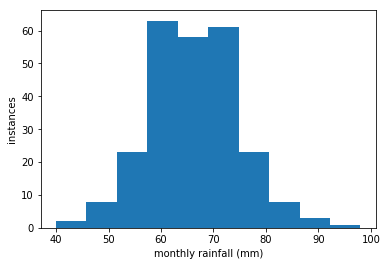

In [55]:
# Monthly Rainfall (rain) looks like a Poisson distribution.
# generate a random sample of 250 values using a poision distribution with lamda of 66
srain = np.random.poisson(lam=(66), size=(250))
plt.xlabel ('monthly rainfall (mm)')
plt.ylabel ('instances')
plt.hist(srain)
plt.show()

In [58]:
# convert the data array to a dataframe:
srain = pd.DataFrame(np.array(srain))
srain.describe()

,0
count,250.000000
mean,65.904000
std,8.577943
min,40.000000
25%,60.000000
50%,66.000000
75%,71.000000
max,98.000000


In [60]:
# to test distribution for 'skewness', find the median 
srain = np.median(srain)
print (srain)
# so the median is :

66.0


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


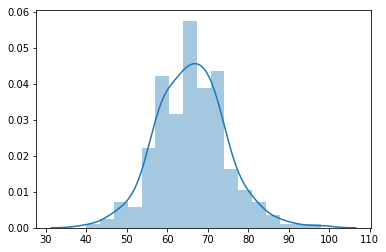

In [59]:
sns.distplot(srain);

CONCLUSION: 
While this Poisson Distribution can be manipulated by the inputs to produce a mean value almost identical to the original real data mean, no amount of manipulation has delivered authentic figures for the remainder of the descriptive statistics. In addition, the median & mean identical, so there's zero skew in the distribution (the real data shows significant positive skew). This is not a good fit as a simulation.

Lets try simulating rain data using the normal distribtion.

In [61]:
np.random.seed(55219)

In [62]:
rain = np.random.normal(66.385375, 40.455267, 500).round(1) # (mu, sigma, size), Float 1
# using the mean & standard deviation of the actual data in the original 'real world' sample.

In [63]:
# convert the data array to a dataframe:
rain = pd.DataFrame(np.array(rain))
rain.describe()

,0
count,500.000000
mean,62.437400
std,39.032351
min,-62.100000
25%,35.375000
50%,62.200000
75%,88.350000
max,185.800000


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


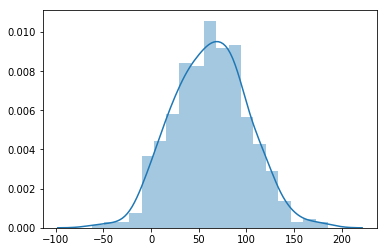

In [64]:
#plot the Normal probability distribution for the synthetic 'rain' values
sns.distplot(rain);

CONCLUSION:  This simulation produces negative values. One cannot have negative amounts of rain. Lets explore the Binomial Distribution, as it guarantees positive integers:

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


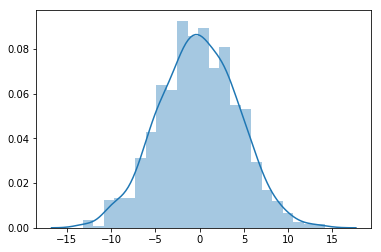

In [48]:
# wd variable looks like a normal distribution
wd = np.random.normal(0,4.3,1000)
sns.distplot(wd);

## Synthesise a dataset for rain days 'rd'

In [49]:
# from Ian's Statistical Bias video
np.set_printoptions(formatter={'float': lambda x: "{0:6.3f}".format(x)})
sampsize = 1
nosamps = 250
samp = np.random.standard_normal((nosamps, sampsize))
print(samp)

[[ 0.316]
 [-1.148]
 [-0.241]
 [-0.079]
 [ 0.211]
 [-0.035]
 [-0.186]
 [ 0.330]
 [ 1.759]
 [-1.600]
 [-2.524]
 [ 0.027]
 [-2.347]
 [ 1.169]
 [-2.028]
 [-0.756]
 [ 1.796]
 [ 0.066]
 [-1.575]
 [-0.600]
 [ 0.609]
 [ 1.086]
 [-1.303]
 [-1.961]
 [-0.379]
 [ 0.363]
 [-0.770]
 [-0.034]
 [ 0.598]
 [ 1.346]
 [ 0.770]
 [ 0.922]
 [ 0.164]
 [-0.588]
 [-0.735]
 [ 0.068]
 [ 1.349]
 [-0.916]
 [-0.999]
 [-0.677]
 [-0.471]
 [-0.887]
 [ 0.878]
 [-0.436]
 [ 0.350]
 [ 0.439]
 [ 1.856]
 [-0.510]
 [ 0.386]
 [-1.050]
 [-1.282]
 [-0.948]
 [-0.252]
 [ 1.033]
 [-0.764]
 [-2.925]
 [-0.143]
 [ 0.339]
 [-1.235]
 [ 0.059]
 [ 1.482]
 [ 0.766]
 [ 2.012]
 [-0.443]
 [ 0.205]
 [ 1.905]
 [ 0.625]
 [-0.949]
 [ 0.680]
 [ 0.180]
 [-0.148]
 [-1.507]
 [-0.642]
 [-0.209]
 [-1.766]
 [-0.271]
 [ 0.432]
 [-0.721]
 [-0.360]
 [ 0.175]
 [-0.003]
 [-0.263]
 [-0.534]
 [-0.684]
 [ 1.439]
 [-0.643]
 [-1.035]
 [-0.435]
 [ 0.801]
 [ 0.524]
 [-0.980]
 [ 0.465]
 [-0.734]
 [-0.305]
 [-2.367]
 [ 0.667]
 [-0.905]
 [ 0.075]
 [ 0.635]
 [-0.884]


In [50]:
# convert the data array to a dataframe:
df = pd.DataFrame(np.array(samp))

In [51]:
#get the summary statistics
df.describe()

,0
count,250.000000
mean,-0.013764
std,0.999695
min,-2.925486
25%,-0.642681
50%,-0.069984
75%,0.661803
max,2.479278


following this methodology (https://www.researchgate.net/post/Is_there_a_way_of_generating_random_fake_numerical_data_that_would_fit_statistical_descriptions)

To manipulate the values closer to the original dataset, I must (1) subtract the mean from all the values, (2) create a new dataframe, (3) calculate the sd of the resulting df, (4) divide the sd of the original dataset by the sd of the calculated dataset to a get a co-efficient. (5) Then multiply all the simulated values by that coefficient, (6) add the desired mean (ie. of the original dataset) back to all the values to get the final simulated dataset which should immitate the original quite well.

step (1): add another column of values made by subtracting the mean from the df values:

In [52]:
df.columns = ['value', 'less mean', 'coef', 'add mean']
df['less mean'] = '0'
df['coef'] = '0'
df['add mean'] = '0'
df

ValueError: Length mismatch: Expected axis has 1 elements, new values have 4 elements